In [1]:
import numpy as np
from nnodely import *
from nnodely import relation

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>-- nnodely_v1.2.4 --<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


In [2]:
def fun(x,K):
    return x**2+x*K

In [3]:
relation.CHECK_NAMES = False
v = Input('v')
out1 = Output('out1',ParamFun(fun)(Fir(v.last())))
out2 = Output('out2',Linear(Fuzzify(centers=[-3,0,5])(Fir(v.last()))))
relation.CHECK_NAMES = True

In [4]:
n = Modely(MPLNotebookVisualizer())
n.addModel('model',[out1,out2])
n.addMinimize('err1',v.next(),out1)
n.addMinimize('err2',v.last(),out2)
n.neuralizeModel(1)

================================ nnodely Model =================================
{'Constants': {},
 'Functions': {'FFuzzify6': {'centers': [-3, 0, 5],
                             'dim_out': {'dim': 3},
                             'functions': 'Triangular',
                             'names': 'Triangular'},
               'FParamFun2': {'code': 'def fun(x,K):\n    return x**2+x*K\n',
                              'in_dim': [{'dim': 1, 'sw': 1}],
                              'map_over_dim': False,
                              'n_input': 1,
                              'name': 'fun',
                              'params_and_consts': ['FParamFun2K']}},
 'Info': {'SampleTime': 1, 'ns': [1, 1], 'ntot': 2},
 'Inputs': {'v': {'dim': 1,
                  'ns': [1, 1],
                  'ntot': 2,
                  'sw': [-1, 1],
                  'tw': [0, 0]}},
 'Minimizers': {'err1': {'A': 'SamplePart10', 'B': 'out1', 'loss': 'mse'},
                'err2': {'A': 'SamplePart12', 'B': 

In [5]:
n.visualizer.showFunctions(['FParamFun9'])

In [6]:
data = {'v':np.linspace(1,10,num=100).tolist()}
n.loadData('train',data)

============================ nnodely Model Dataset =============================
Dataset Name:                 train
Number of files:              1
Total number of samples:      99
Shape of v:                   (99, 2, 1)


======================== nnodely Model Train Parameters ========================
models:                       ['model']
num of epochs:                100
update per epochs:            1.0
└>(n_samples-batch_size)/batch_size+1
shuffle data:                 True
train dataset:                train_train_0.70
	- num of samples:            69
	- batch size:                69
	- unused samples:            0.0
	  └>n_samples-update_per_epochs*batch_size
val dataset:                  validation_train_0.20
val {batch size, samples}:    {20, 20}
test dataset:                 test_train_0.10
test {batch size, samples}:   {10, 10}
minimizers:                   {'err1': {'A': 'SamplePart10',
                                        'B': 'out1',
                                        'loss': 'mse'},
                               'err2': {'A': 'SamplePart12',
                                        'B': 'out2',
                                        'loss': 'mse'}}
optimizer:                    A

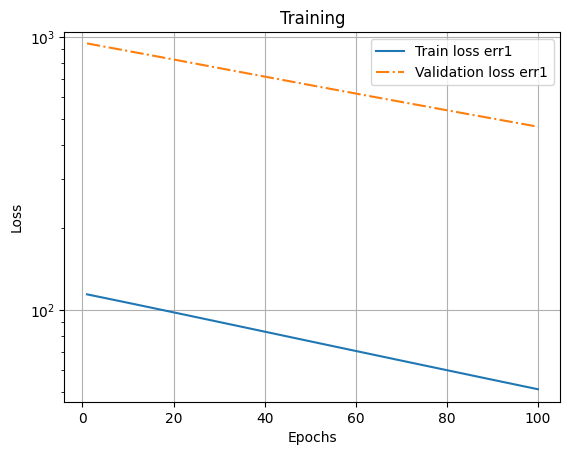

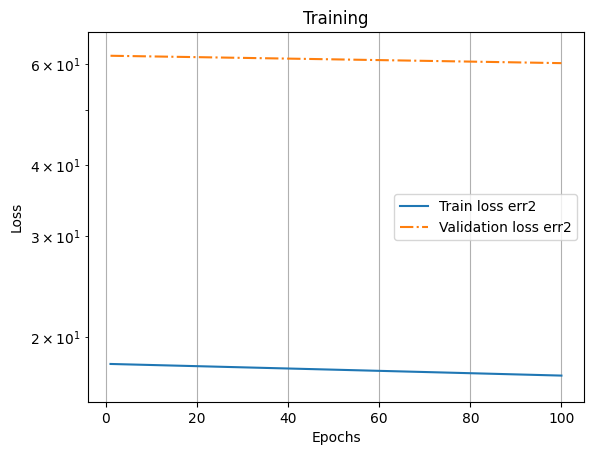

============================ nnodely Training Time =============================
Total time of Training:       0.11544990539550781
The selected model is the LAST model of the training.
=========== nnodely Model Results for train_train_0.70 ===========
|Loss|        mse        |        FVU        |        AIC        |
|    |    small better   |    small better   |    lower better   |
|----------------------------------------------------------------|
|err1|     5.072e+01     |     4.005e+00     |     5.024e+02     |
|err2|      1.71e+01     |     2.011e+04     |     5.835e+02     |
|----------------------------------------------------------------|
|Total|     3.391e+01     |     1.006e+04     |      5.43e+02     |
|----------------------------------------------------------------|


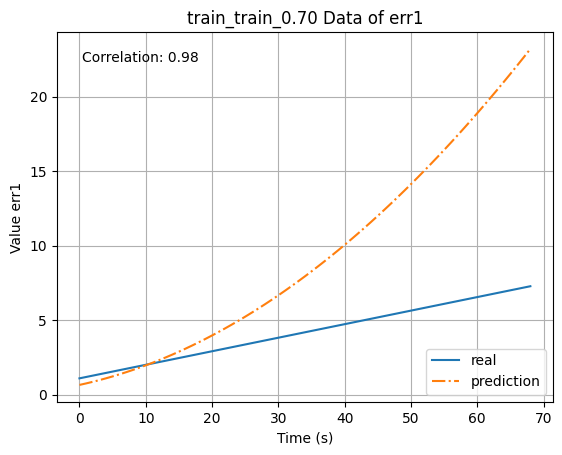

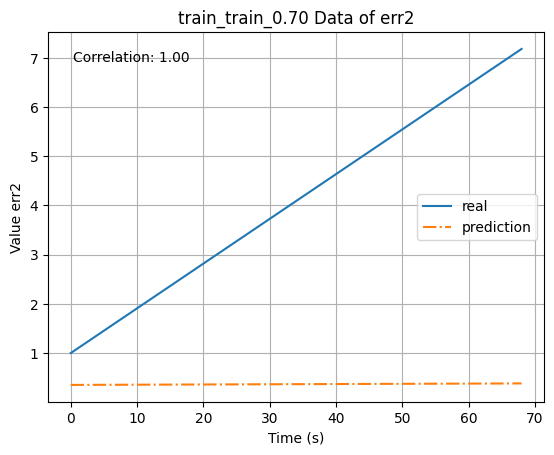

======== nnodely Model Results for validation_train_0.20 =========
|Loss|        mse        |        FVU        |        AIC        |
|    |    small better   |    small better   |    lower better   |
|----------------------------------------------------------------|
|err1|     4.685e+02     |     1.854e+01     |     1.033e+03     |
|err2|     6.029e+01     |     2.011e+04     |     4.455e+03     |
|----------------------------------------------------------------|
|Total|     2.644e+02     |     1.006e+04     |     2.744e+03     |
|----------------------------------------------------------------|


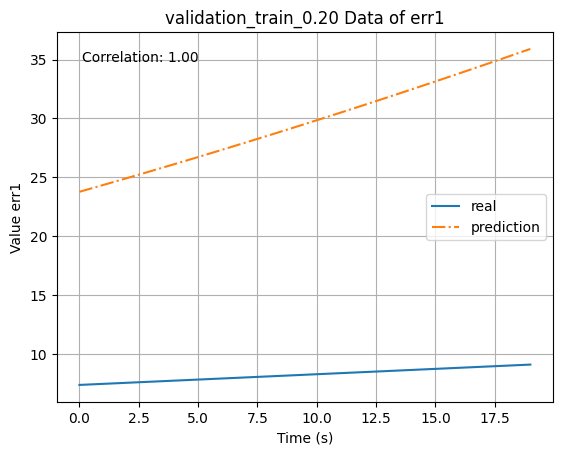

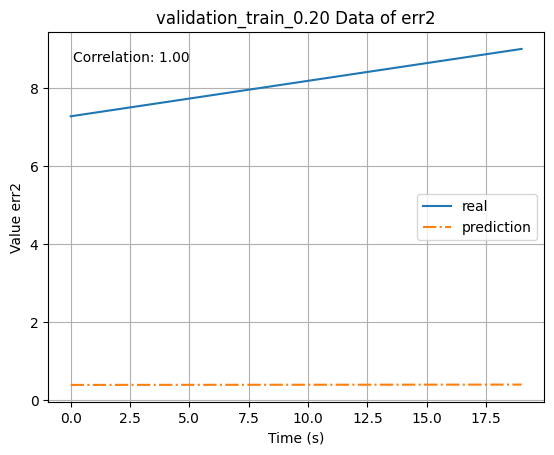

=========== nnodely Model Results for test_train_0.10 ============
|Loss|        mse        |        FVU        |        AIC        |
|    |    small better   |    small better   |    lower better   |
|----------------------------------------------------------------|
|err1|     9.227e+02     |     2.605e+01     |     2.679e+03     |
|err2|     8.295e+01     |     2.011e+04     |     1.229e+04     |
|----------------------------------------------------------------|
|Total|     5.029e+02     |     1.007e+04     |     7.485e+03     |
|----------------------------------------------------------------|


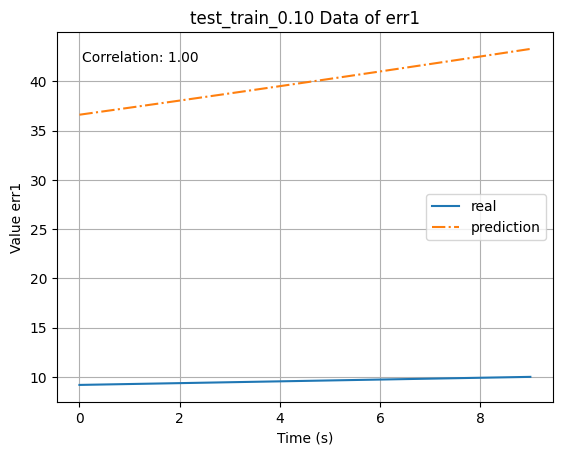

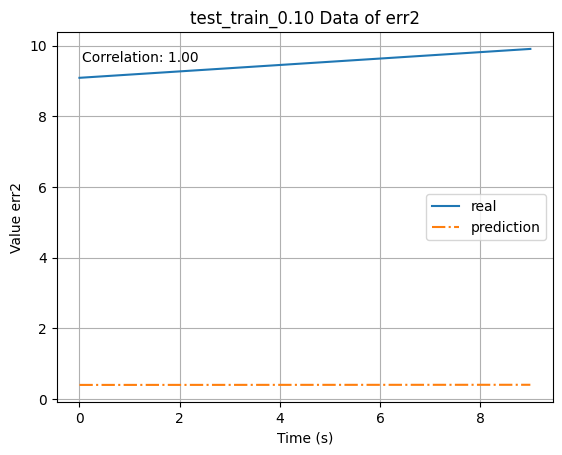

In [7]:
n.trainModel()

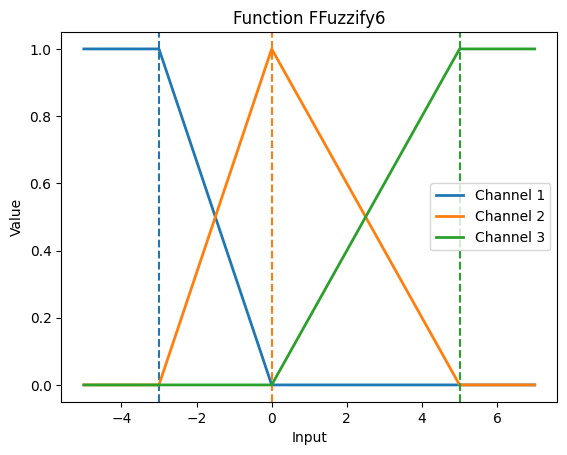

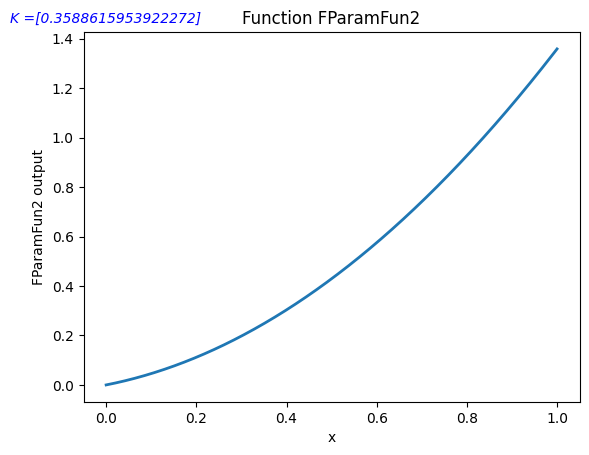

In [8]:
n.visualizer.showFunctions(list(n.model_def['Functions'].keys()))